## Library Import


In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
#Data = pd.read_csv('apartments.csv', sep=';', encoding='latin-1')
Data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='latin-1')

C:\Users\SANTI\AppData\Local\Temp\ipykernel_6724\2903586853.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='latin-1')


In [192]:

sns.set(style='whitegrid',context='notebook')
Data.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

## Types of data

In [193]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [194]:
Data['amenities'].value_counts()

amenities
Parking                                                                                                    6188
Parking,Storage                                                                                            2116
Gym,Pool                                                                                                   1871
Pool                                                                                                       1485
Gym,Parking,Pool                                                                                           1187
                                                                                                           ... 
Clubhouse,Gym,Patio/Deck,Pool,Storage,Tennis                                                                  1
Elevator,Gated,Parking,Wood Floors                                                                            1
AC,Cable or Satellite,Dishwasher,Fireplace,Garbage Disposal,Patio/Deck,Refrigerator,Tennis,Was

In [195]:
Data['amenities']=Data['amenities'].replace(np.nan,'Nothing')

In [196]:
Data['bathrooms']=Data['bathrooms'].fillna(0)

In [197]:
Data['bedrooms']=Data['bedrooms'].fillna(0)

In [198]:
Data['fee'].value_counts()

fee
No     99291
Yes      201
Name: count, dtype: int64

In [199]:
Data['currency'].value_counts()

currency
USD    99492
Name: count, dtype: int64

In [200]:
Data=Data.drop(columns='fee')

In [201]:
Data=Data.drop(columns='currency')

In [202]:
Data['has_photo'].value_counts()

has_photo
Yes          55974
Thumbnail    34303
No            9215
Name: count, dtype: int64

In [203]:
Data['pets_allowed'].value_counts()


pets_allowed
Cats,Dogs         37097
Cats               1843
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64

In [204]:
Data['pets_allowed']=Data['pets_allowed'].fillna('No')

In [205]:
Data['pets_allowed'].value_counts()

pets_allowed
No                60424
Cats,Dogs         37097
Cats               1843
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Price Distribution')

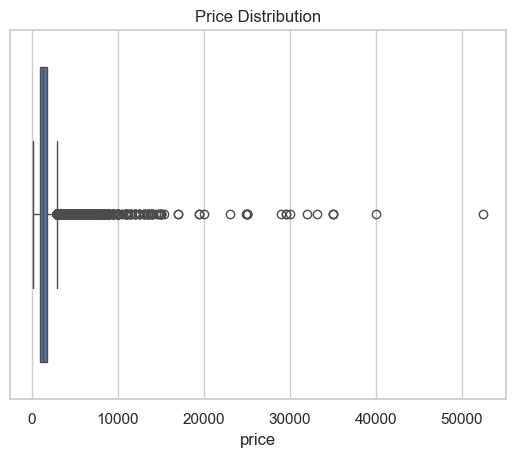

In [206]:
sns.boxplot(x=Data['price'])
plt.title('Price Distribution')

In [207]:
Data['price_display'].value_counts()

price_display
$1,350    574
$850      547
$1,200    538
$950      528
$1,100    522
         ... 
$3,319      1
$3,828      1
$4,069      1
$4,163      1
$4,326      1
Name: count, Length: 3718, dtype: int64

In [208]:
Data_Clean=Data.copy()

In [209]:
Data_Clean=Data_Clean.drop(columns='price_display')

In [210]:
Data_Clean['price_type'].value_counts()

price_type
Monthly           99488
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64

In [211]:
Data_Clean = Data_Clean.drop(Data_Clean[Data_Clean['price_type'] == 'Weekly'].index)


In [212]:
Data_Clean = Data_Clean.drop(Data_Clean[Data_Clean['price_type'] == 'Monthly|Weekly'].index)


In [213]:
Data_Clean=Data_Clean.drop(columns='price_type')

In [214]:
Data_Clean['address'].value_counts()

address
8215 S.W 72nd Avenue        19
2647 Eastgate Road           8
901 Valley View Circle       7
5903 Danny Kaye Drive        6
700 Watkins Ave              6
                            ..
2919 West Avenue             1
7228 N Burlington Avenue     1
1616 Anthony St              1
714 N 95th St                1
4507 South Indiana           1
Name: count, Length: 7770, dtype: int64

In [215]:
Data_Clean['category'].value_counts()


category
housing/rent/apartment            99427
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

In [216]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/apartment','apartment')

In [217]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/home','home')

In [218]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/short_term','short_term')

In [219]:
Data_Clean['category'].value_counts()

category
apartment                         99427
housing/rent/commercial/retail       42
housing/rent                          7
home                                  4
short_term                            4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Square feet distribution')

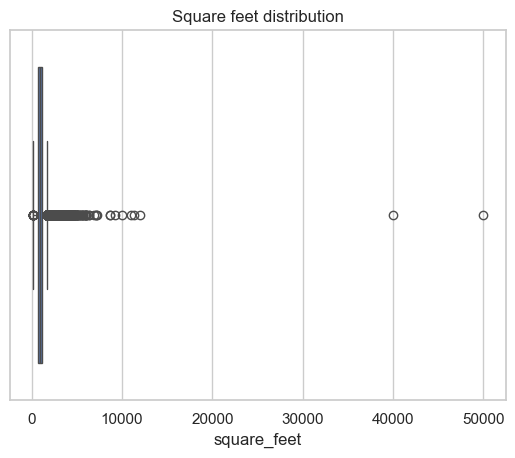

In [220]:
sns.boxplot(x=Data['square_feet'])
plt.title('Square feet distribution')

In [221]:
Data['cityname'].value_counts().size

2979

In [222]:
Data['state'].value_counts().size

51

In [223]:
Data_Clean['bathrooms']=Data_Clean['bathrooms'].astype(float).astype(int)

In [224]:
Data_Clean['bedrooms']=Data_Clean['bedrooms'].astype(float).astype(int)

In [225]:
Data_Clean['time']=pd.to_datetime(Data_Clean['time'],unit='s')

In [226]:
Data_Clean=Data_Clean.drop(columns=['title','body','address','latitude','longitude','id','time'])

In [227]:
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99488 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      99488 non-null  object 
 1   amenities     99488 non-null  object 
 2   bathrooms     99488 non-null  int32  
 3   bedrooms      99488 non-null  int32  
 4   has_photo     99488 non-null  object 
 5   pets_allowed  99488 non-null  object 
 6   price         99487 non-null  float64
 7   square_feet   99488 non-null  int64  
 8   cityname      99186 non-null  object 
 9   state         99186 non-null  object 
 10  source        99488 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 8.3+ MB


In [228]:
Data_Clean.describe()

,bathrooms,bedrooms,price,square_feet
count,99488.000000,99488.000000,99487.000000,99488.000000
mean,1.416693,1.726057,1527.006252,956.404551
std,0.532570,0.751169,903.982511,417.461141
min,0.000000,0.000000,100.000000,101.000000
25%,1.000000,1.000000,1013.000000,729.000000
50%,1.000000,2.000000,1350.000000,900.000000
75%,2.000000,2.000000,1795.000000,1115.000000
max,9.000000,9.000000,52500.000000,50000.000000


In [229]:
Data_Clean.head()

,category,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,source
0,apartment,Nothing,1,1,Thumbnail,Cats,2195.0,542,Redondo Beach,CA,RentLingo
1,apartment,Nothing,1,3,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA,RentLingo
2,apartment,Nothing,2,3,Thumbnail,No,1395.0,1650,Raleigh,NC,RentLingo
3,apartment,Nothing,1,2,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA,RentLingo
4,apartment,Nothing,1,1,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM,RentLingo


## Integer Conversion

In [230]:
Data_Clean['price'] = Data_Clean['price'].fillna(0).astype(int)


In [231]:
from sklearn.preprocessing import LabelEncoder

Col_to_enc = ['category', 'amenities', 'has_photo', 'pets_allowed', 'cityname', 'state', 'source']


for col in Col_to_enc:
    if col in Data_Clean.columns:  
        le = LabelEncoder()
        Data_Clean[col + '_encoded'] = le.fit_transform(Data_Clean[col])


In [232]:
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99488 entries, 0 to 99491
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              99488 non-null  object
 1   amenities             99488 non-null  object
 2   bathrooms             99488 non-null  int32 
 3   bedrooms              99488 non-null  int32 
 4   has_photo             99488 non-null  object
 5   pets_allowed          99488 non-null  object
 6   price                 99488 non-null  int32 
 7   square_feet           99488 non-null  int64 
 8   cityname              99186 non-null  object
 9   state                 99186 non-null  object
 10  source                99488 non-null  object
 11  category_encoded      99488 non-null  int32 
 12  amenities_encoded     99488 non-null  int32 
 13  has_photo_encoded     99488 non-null  int32 
 14  pets_allowed_encoded  99488 non-null  int32 
 15  cityname_encoded      99488 non-null  int

In [233]:
Data_Clean_Enc=Data_Clean.select_dtypes(int,float)


In [234]:
Data_Clean_Enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99488 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   bathrooms             99488 non-null  int32
 1   bedrooms              99488 non-null  int32
 2   price                 99488 non-null  int32
 3   square_feet           99488 non-null  int64
 4   category_encoded      99488 non-null  int32
 5   amenities_encoded     99488 non-null  int32
 6   has_photo_encoded     99488 non-null  int32
 7   pets_allowed_encoded  99488 non-null  int32
 8   cityname_encoded      99488 non-null  int32
 9   state_encoded         99488 non-null  int32
 10  source_encoded        99488 non-null  int32
dtypes: int32(10), int64(1)
memory usage: 5.3 MB


In [235]:
#Data_Clean_Enc.groupby('state_encoded').size().sort_values(ascending=False)
#Data_Clean_Enc=Data_Clean_Enc[Data_Clean_Enc['state_encoded']==43]


In [236]:
Data_Clean_Enc.to_csv('apartments_clean.csv',index=False)

In [242]:
Data_Clean_Enc.groupby('state_encoded').size().sort_values(ascending=False)
Data_Clean_En_TX=Data_Clean_Enc[Data_Clean_Enc['state_encoded']==43]


In [243]:
Data_Clean_En_TX.to_csv('apartments_clean_TX.csv',index=False)